In [2]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup

In [3]:
movie_text = input('어떤 영화의 평점리뷰를 수집할까요?')
page = int(input('몇페이지를 수집할까요?'))

어떤 영화의 평점리뷰를 수집할까요?스파이더맨 노웨이홈
몇페이지를 수집할까요?50


In [4]:
chrome_path = 'C:\chromedriver\chromedriver.exe'
driver = webdriver.Chrome(chrome_path)
url = 'https://www.naver.com/'
driver.get(url)
time.sleep(1)

## 검색창 입력
element = driver.find_element_by_xpath('//*[@id="query"]')
driver.find_element_by_xpath('//*[@id="query"]').click()
element.send_keys(movie_text)
element.send_keys('\n')
time.sleep(2)

## 평점 리뷰 들어가기
driver.find_element_by_class_name('_text').click()
time.sleep(1)
driver.switch_to.window(driver.window_handles[1])
driver.find_element_by_xpath('//*[@id="movieEndTabMenu"]/li[5]/a/em').click()
time.sleep(3)

review = []
driver.switch_to.frame('pointAfterListIframe')

## 리뷰 수집
for i in range(2,page+1):
    html = driver.page_source
    soup = BeautifulSoup(html,'html.parser')

    review_ = soup.select('div.score_result > ul > li > div.score_reple > p')
    for i in range(0,len(review_)):
        review.append(review_[i].get_text())

    ## 다음페이지로 넘어가기
    try:
        driver.find_element_by_link_text('다음').click()
        time.sleep(2)
    except:
        break    ### 페이지수 넘어가면 넘추기

C:\Users\LIMDON~1\AppData\Local\Temp/ipykernel_13960/4076811280.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_path)
C:\Users\LIMDON~1\AppData\Local\Temp/ipykernel_13960/4076811280.py:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  element = driver.find_element_by_xpath('//*[@id="query"]')
C:\Users\LIMDON~1\AppData\Local\Temp/ipykernel_13960/4076811280.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="query"]').click()
C:\Users\LIMDON~1\AppData\Local\Temp/ipykernel_13960/4076811280.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_class_name('_text').click()
C:\Users\LIMDON~1\AppData\Local\Temp/ipykernel_13960/4076811280.py:18: DeprecationWarning: find_element_by_* commands are dep

In [21]:
review_list = []
for i in review:
    i = i.replace('관람객','')
    i = i.strip()
    if not '스포일러가 포함된 감상평입니다' in i: ## 스포일러 미포함
        review_list.append(i)

In [22]:
review_list

['삼십 대의 내가 십 대, 이십 대의 나를 만났다',
 '스파이더맨 1 부터 본 사람이면 재미없을 수가 없다',
 '전 스파이더맨  두명이 자책했던 일들이 여기서 어느정도 구원받았다는거에  감사드립니다',
 '엔드게임을 뛰어넘는 영화가 죽기전에 나올까 생각했었는데.. 2년만에 나왔습니다',
 '마블이 준비한 크리스마스 선물',
 '21세기 가장 최고의 X소리 : 어벤져스 이후 마블 영화는 안봄.',
 '닥터옥토버스가 토비에게 "다컸구나 잘지냈니?" 는 어린시절 스파이더맨보고자란 사람들에게 하는말 같았고 토비의 "애쓰고있죠" 또한 내 상황에 너무 잘들어맞아 울컥했다',
 '개인적으로 그린 고블린이 살렸다',
 '가능하면 여분의 팬티를 챙겨가세요',
 '??? : 암세포도 생명이다',
 '수많은 빌런들의 등장으로 스토리가 중구난방이 될까 걱정했지만,그들의 등장은 레전드 장면을 위한 빌드업이었다.',
 '이건 스파이더맨 팬들을 향한 눈물나는 선물같은 영화 ㅠㅠ',
 '우리는 스파이더맨’들’을 사랑해',
 '스포 당하기 전에 얼른 보세요.개인적으로 이 영화는 엔드게임과 비등합니다.',
 '그동안 안죽고 열심히 살길 잘했다',
 '톰의 스파이더맨이 이렇게 끝나도 완벽했다고 할정도로 스토리라인 넘좋았음 하지만 3편 연장계약ㅋㅋㅋㅋ톰스파 영원하자',
 '엔딩크레딧 올라가는 와중에도 계속 울었네요. mcu 입문 계기가 시빌워 스파이더맨 등장이었을 만큼 예전부터 스파이더맨을 좋아했고 지금도 좋아합니다. 후회없으실 거예요. 스파이더맨을 사랑하는 사람들이라면 울지 않을 수...',
 '진짜 이터널스보고 찢겨진 내 영혼.. 이걸로 회복했네요.. 텍마머니..모든 스파이더맨의 정수가 담겨있음',
 '아놔 기대 하고 갔는데.... 기대를 훌쩍 뛰어넘는 ㅠ',
 '스파이더맨 : 엔드게임',
 '모든 스파이더맨 시리즈를 보아온 사람에게는 선물과도 같은 영화',
 '여러분의 기대 이상입니다.',
 '큰 힘엔 큰 책임이 따른다',
 '역시 믿고보는 스파이더맨 시리즈',
 '덕후들 심장 터지게

In [23]:
review_list = ','.join(review_list)## 형태소 분석기 형태로 바꿈

In [24]:
review_list

'삼십 대의 내가 십 대, 이십 대의 나를 만났다,스파이더맨 1 부터 본 사람이면 재미없을 수가 없다,전 스파이더맨  두명이 자책했던 일들이 여기서 어느정도 구원받았다는거에  감사드립니다,엔드게임을 뛰어넘는 영화가 죽기전에 나올까 생각했었는데.. 2년만에 나왔습니다,마블이 준비한 크리스마스 선물,21세기 가장 최고의 X소리 : 어벤져스 이후 마블 영화는 안봄.,닥터옥토버스가 토비에게 "다컸구나 잘지냈니?" 는 어린시절 스파이더맨보고자란 사람들에게 하는말 같았고 토비의 "애쓰고있죠" 또한 내 상황에 너무 잘들어맞아 울컥했다,개인적으로 그린 고블린이 살렸다,가능하면 여분의 팬티를 챙겨가세요,??? : 암세포도 생명이다,수많은 빌런들의 등장으로 스토리가 중구난방이 될까 걱정했지만,그들의 등장은 레전드 장면을 위한 빌드업이었다.,이건 스파이더맨 팬들을 향한 눈물나는 선물같은 영화 ㅠㅠ,우리는 스파이더맨’들’을 사랑해,스포 당하기 전에 얼른 보세요.개인적으로 이 영화는 엔드게임과 비등합니다.,그동안 안죽고 열심히 살길 잘했다,톰의 스파이더맨이 이렇게 끝나도 완벽했다고 할정도로 스토리라인 넘좋았음 하지만 3편 연장계약ㅋㅋㅋㅋ톰스파 영원하자,엔딩크레딧 올라가는 와중에도 계속 울었네요. mcu 입문 계기가 시빌워 스파이더맨 등장이었을 만큼 예전부터 스파이더맨을 좋아했고 지금도 좋아합니다. 후회없으실 거예요. 스파이더맨을 사랑하는 사람들이라면 울지 않을 수...,진짜 이터널스보고 찢겨진 내 영혼.. 이걸로 회복했네요.. 텍마머니..모든 스파이더맨의 정수가 담겨있음,아놔 기대 하고 갔는데.... 기대를 훌쩍 뛰어넘는 ㅠ,스파이더맨 : 엔드게임,모든 스파이더맨 시리즈를 보아온 사람에게는 선물과도 같은 영화,여러분의 기대 이상입니다.,큰 힘엔 큰 책임이 따른다,역시 믿고보는 스파이더맨 시리즈,덕후들 심장 터지게 하려고 이갈고 만든 영화..레전드로 남을듯,애새1기더맨의 홀로서기 성공,스파이더맨의 완성 그냥 미쳤음,초반 스파이더맨의 선택에 갸우뚱하지만 그런 선택이 스파이더맨의 존재이유

## 빈도분석

형태소 분석기 rhinoMorph사용

In [8]:
## 동작 확인
import rhinoMorph

In [9]:
rn = rhinoMorph.startRhino()

filepath:  C:\ProgramData\Anaconda3\Lib\site-packages
classpath:  C:\ProgramData\Anaconda3\Lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


In [31]:
text = '라이노 형태소 분석기 동작 확인'
data = rhinoMorph.onlyMorph_list(rn, text)
print(data)

['라', '이', '노', '형태소', '분석기', '동작', '확인']


In [32]:
review_rn = rhinoMorph.onlyMorph_list(rn,review_list, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)

In [33]:
print(review_rn)

['대의', '대의', '만나다', '스파이더맨', '보다', '사람', '재미없다', '없다', '스파이더맨', '자책', '일', '여기다', '어느', '정도', '구원', '받다', '감사', '드리다', '엔드', '게임', '뛰어넘다', '영화', '죽기', '전', '나오다', '생각하다', '나오다', '마블', '준비', '하다', '크리스마스', '선물', '세기', '가장', '최고', '소리', '어벤져스', '이후', '마블', '영화', '안', '보다', '닥터', '옥토', '버스', '토비', '다', '크다', '자다', '어린', '시절', '스파이더맨', '보고자', '사람', '하다', '말다', '같다', '토비', '애쓰다', '고', '있다', '또한', '내다', '상황', '너무', '잘', '들어맞다', '울컥', '개인적', '그린', '고블린', '살리다', '가능', '팬티', '챙기다', '암세포', '생명', '수많다', '빌', '런', '등장', '스토리', '중구난방', '되다', '걱정', '등장', '레전드', '장면', '위하다', '빌', '업', '스파이더맨', '팬', '향하다', '눈물', '날다', '선물', '같다', '영화', 'ㅠㅠ', '스파이더맨', '들다', '사랑하다', '스포', '전', '얼른', '보다', '개인적', '이', '영화', '엔드', '게임', '비등', '그동안', '안', '죽다', '열심히', '살길', '잘', '하다', '톰', '스파이더맨', '이렇게', '끝나다', '완벽', '정도', '스토리', '라인', '너무', '좋다', '하지만', '연장', '계약', 'ㅋㅋ', 'ㅋㅋ', '톰스', '파다', '영원', '엔딩', '크레딧', '올라가다', '와중', '계속', '울다', '입문', '계기', '시', '빌다', '스파이더맨', '등장', '예전', '스파이더맨', '좋아하다', '지금', '좋아하다', '후회', '없다', '스

In [34]:
from collections import Counter

In [37]:
review_Info = Counter(review_rn) 

In [38]:
review_Info

Counter({'대의': 2,
         '만나다': 5,
         '스파이더맨': 168,
         '보다': 112,
         '사람': 25,
         '재미없다': 3,
         '없다': 31,
         '자책': 1,
         '일': 5,
         '여기다': 1,
         '어느': 2,
         '정도': 15,
         '구원': 1,
         '받다': 9,
         '감사': 8,
         '드리다': 2,
         '엔드': 14,
         '게임': 16,
         '뛰어넘다': 3,
         '영화': 160,
         '죽기': 1,
         '전': 7,
         '나오다': 22,
         '생각하다': 4,
         '마블': 64,
         '준비': 2,
         '하다': 96,
         '크리스마스': 8,
         '선물': 39,
         '세기': 1,
         '가장': 4,
         '최고': 53,
         '소리': 1,
         '어벤져스': 8,
         '이후': 6,
         '안': 15,
         '닥터': 8,
         '옥토': 1,
         '버스': 1,
         '토비': 5,
         '다': 27,
         '크다': 18,
         '자다': 1,
         '어린': 2,
         '시절': 5,
         '보고자': 1,
         '말다': 8,
         '같다': 33,
         '애쓰다': 1,
         '고': 3,
         '있다': 33,
         '또한': 2,
         '내다': 2,
         '

## 시각화

In [39]:
sorted_keys = sorted(review_Info, key = review_Info.get,reverse=True)
sorted_values = sorted(review_Info.values(),reverse=True)

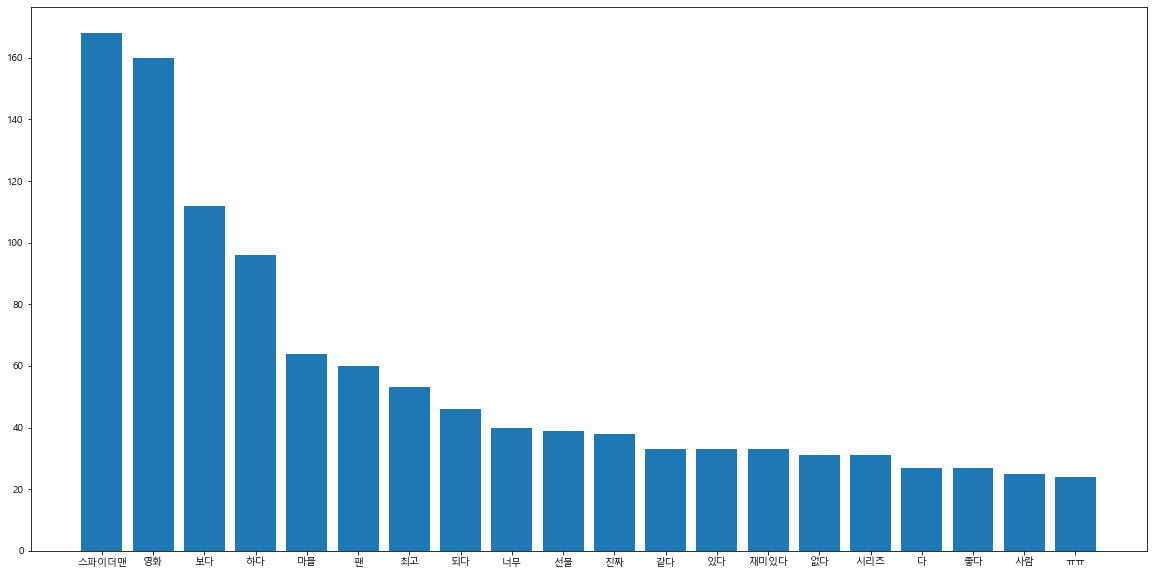

In [61]:
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc    ## matplotlib 한글 설정
fontpath = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=fontpath).get_name()
rc('font', family=font)

plt.figure(figsize=(20,10))
plt.bar(range(20), sorted_values[:20])
plt.xticks(range(20), sorted_keys[:20])
plt.show()

In [60]:
from wordcloud import WordCloud

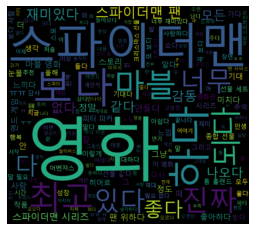

In [72]:
review_wordcloud = WordCloud(font_path=fontpath,width=1000,height=900).generate(" ".join(review_rn))
plt.imshow(review_wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()